<div style="background-color: #7b6832; padding: 20px; border-radius: 10px; box-shadow: 5px 5px 10px #888888;">
  <h1 style="color: cyan; font-size: 40px; font-weight: bold; text-align: center; text-shadow: 2px 2px 4px #000000;">SPORTS PROJECT STORY
</h1>
</div>

<div style="background-color: #3b6832; padding: 20px; border-radius: 10px; box-shadow: 5px 5px 10px #888888;">
  <h1 style="color: cyan; font-size: 20px; font-weight: bold; text-align: center; text-shadow: 2px 2px 4px #000000;">TECH TITANS
</h1>
</div>

In [45]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import plotly.express as px
from scipy import stats
from scipy.stats import zscore
import seaborn as sns

from scipy.stats.mstats import winsorize 
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.io as pio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.decomposition import PCA  # Import PCA correctly
from sklearn.impute import KNNImputer

In [46]:
# Load data from CSV file
df = pd.read_csv("cleaned_sports_dataset.csv")

# PROBLEM STATEMENT 7

### TEAM GOAL ANALYSIS

Team with the most goals: Team B


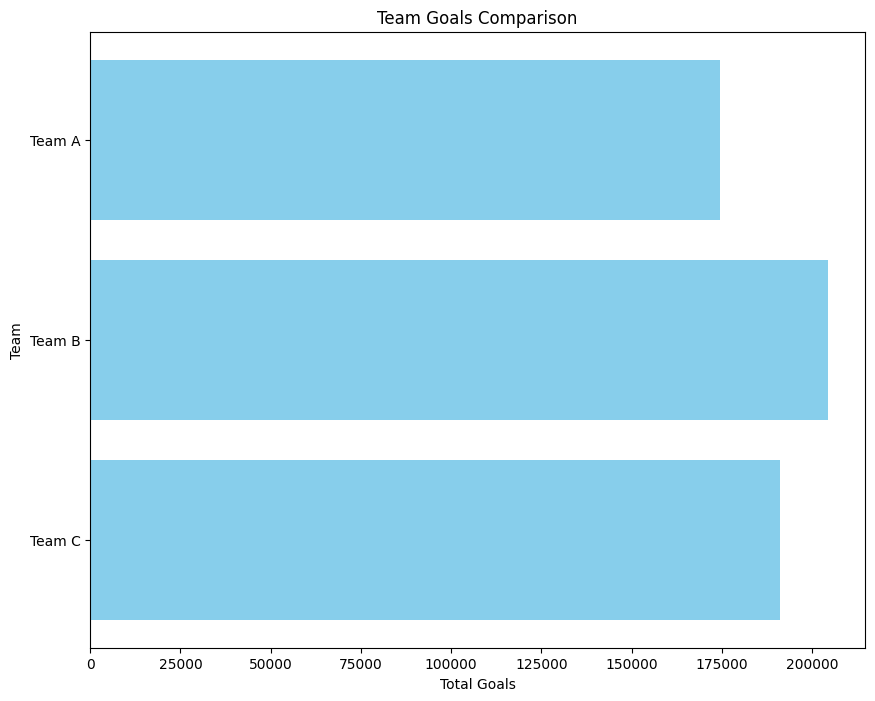

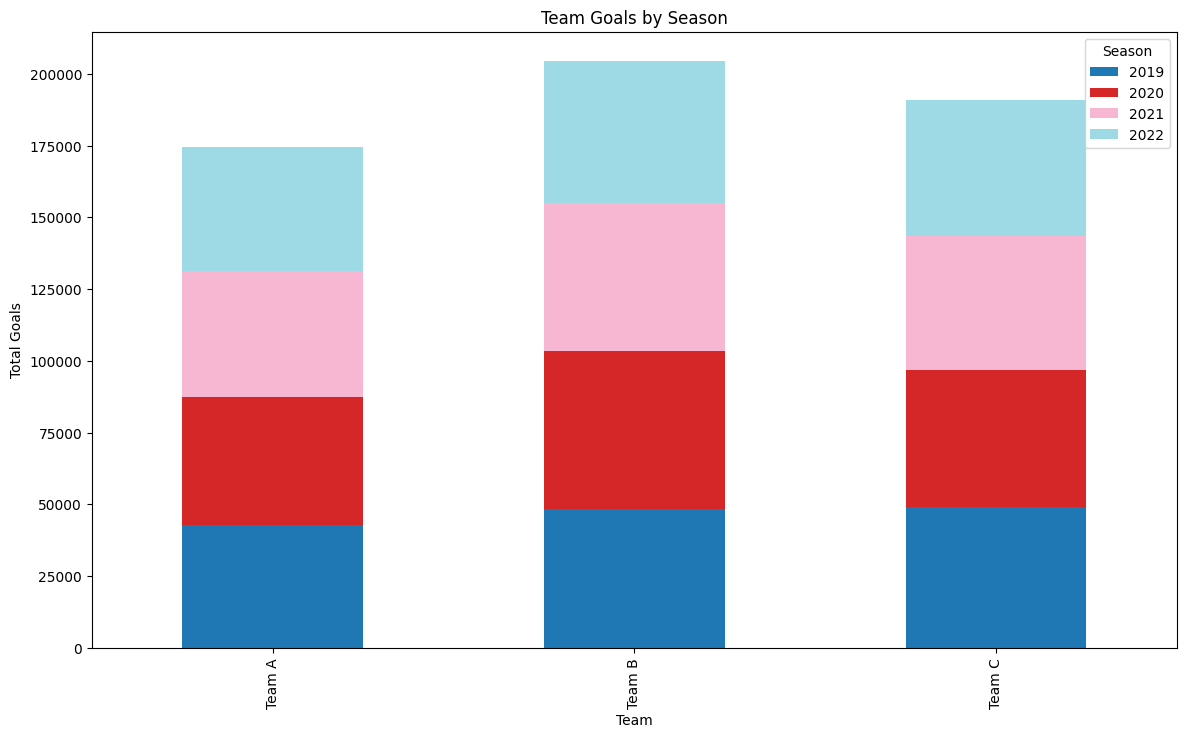

In [47]:
# Group by team and sum goals
team_goals = df.groupby("Team")['Goals'].sum()

# Identify the team with the highest number of goals
top_team = team_goals.index[1]
print(f"Team with the most goals: {top_team}")

# Create horizontal bar plot using Matplotlib
plt.figure(figsize=(10, 8))
plt.barh(team_goals.index, team_goals.values, color='skyblue')
plt.xlabel("Total Goals")
plt.ylabel("Team")
plt.title("Team Goals Comparison")
plt.gca().invert_yaxis()  # Invert y-axis to show the team with the most goals at the top
plt.show()

# Check if 'Season' column exists and convert it to integer
if 'Season' in df.columns:
    df['Season'] = df['Season'].astype(int)
    
    # Group by team and season, sum goals
    team_season_goals = df.groupby(['Team', 'Season'])['Goals'].sum().unstack().fillna(0)
    
    # Plot stacked bar chart
    ax = team_season_goals.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')
    plt.title("Team Goals by Season")
    plt.xlabel("Team")
    plt.ylabel("Total Goals")
    
    # Set integer labels for legend
    handles, labels = ax.get_legend_handles_labels()
    labels = [int(float(label)) for label in labels]
     ax.legend(handles, labels, title="Season")
    
    plt.show()
else:
    print("Season data not available for stacked bar chart.")

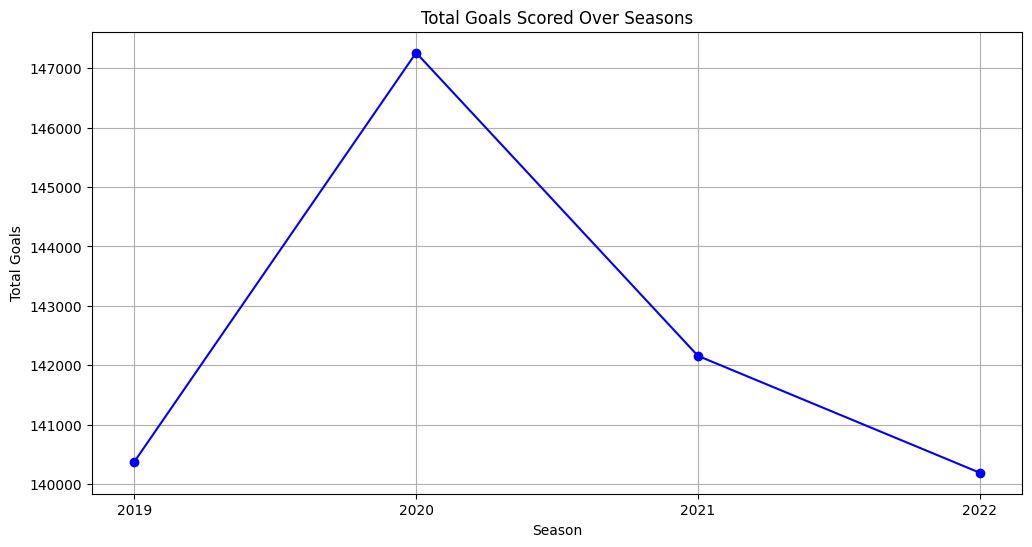

In [48]:
# Check if 'Season' column exists and convert it to integer
if 'Season' in df.columns:
    df['Season'] = df['Season'].astype(int)
    
    # Aggregate the goals by season
    season_goals = df.groupby('Season')['Goals'].sum().reset_index()
    
    # Create a line plot for goal scoring trends over the seasons
    plt.figure(figsize=(12, 6))
    plt.plot(season_goals['Season'], season_goals['Goals'], marker='o', linestyle='-', color='b')
    plt.title("Total Goals Scored Over Seasons")
    plt.xlabel("Season")
    plt.ylabel("Total Goals")
    plt.grid(True)
    plt.xticks(season_goals['Season'])
    plt.show()
else:
    print("Season data not available for time series analysis.")


In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# Load data from CSV file
df = pd.read_csv("cleaned_sports_dataset.csv")


# Check if 'Season' column exists and convert it to integer
if 'Season' in df.columns:
    df['Season'] = df['Season'].astype(int)

# Group by team and sum goals
team_goals = df.groupby("Team")['Goals'].sum().sort_values(ascending=False)

# Identify the team with the highest number of goals
top_team = team_goals.index[0]
print(f"Team with the most goals: {top_team}")

# Filter data for the top team
top_team_data = df[df["Team"] == top_team]

# Identify the top goal scorer
top_scorer = top_team_data.groupby("Player")["Goals"].sum().idxmax()
print(f"Top goal scorer in {top_team}: {top_scorer}")

# Filter data for the top scorer
top_scorer_data = top_team_data[top_team_data["Player"] == top_scorer]

# Analyze top scorer's performance metrics over time
performance_metrics = ['Goals', 'Assists', 'ShotsOnTarget', 'PassCompletionRate', 'DistanceCovered', 'Sprints']
top_scorer_performance = top_scorer_data.groupby('Season')[performance_metrics].sum().reset_index()

# Plot performance metrics over time as a bar plot using Plotly
# Convert to long format for easier plotting with Plotly
top_scorer_performance_long = top_scorer_performance.melt(id_vars='Season', value_vars=performance_metrics,
                                                          var_name='Metric', value_name='Value')

fig = px.bar(top_scorer_performance_long, x='Season', y='Value', color='Metric', barmode='group',
             title=f"Performance Metrics Over Time for {top_scorer}", labels={'Value': 'Metrics', 'Season': 'Season'})

fig.show()

Team with the most goals: Team B
Top goal scorer in Team B: Player A
